# Домашнее задание по Matplotlib и Seaborn
# Light
### *Часть 1. Matplotlib*

### **Задача 1**

Используя библиотеку Matplotlib, постройте график экспоненты. Подпишите оси. Дайте название графику.

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd 
%matplotlib inline

### **Решение:**

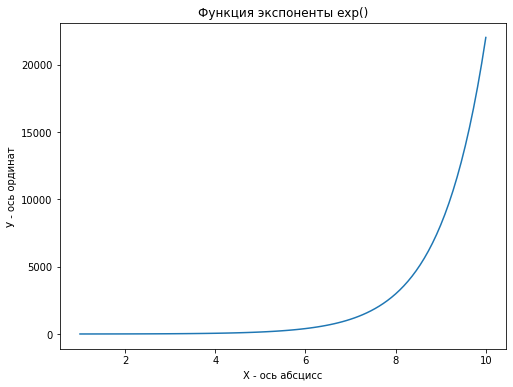

In [ ]:
plt.figure(figsize=(8,6))

x = np.linspace (1, 10,100)              # Создадим множество х
y = np.exp(x)                            # И соответствующее ему множество у, с помощью функции экспоненты

plt.plot(x, y)                           # Построение графика
plt.xlabel ('Х - ось абсцисс')           # Подпись оси х
plt.ylabel ('У - ось ординат')           # Подпись оси у
plt.title ('Функция экспоненты exp()')   # Подпись графика
plt.show()




### **Задача 2**

Используя библиотеку Matplotlib, постройте графики функций $y = x^3$ и $y = x^2$ на одном графике. 

* Дайте название графику 
* Дайте названия осям
* Присвойте лейблы и выведите легенду
* Графики функций должны быть отрисованы пунктирными линиями (любыми из доступных на ваш вкус) 

### **Решение:**

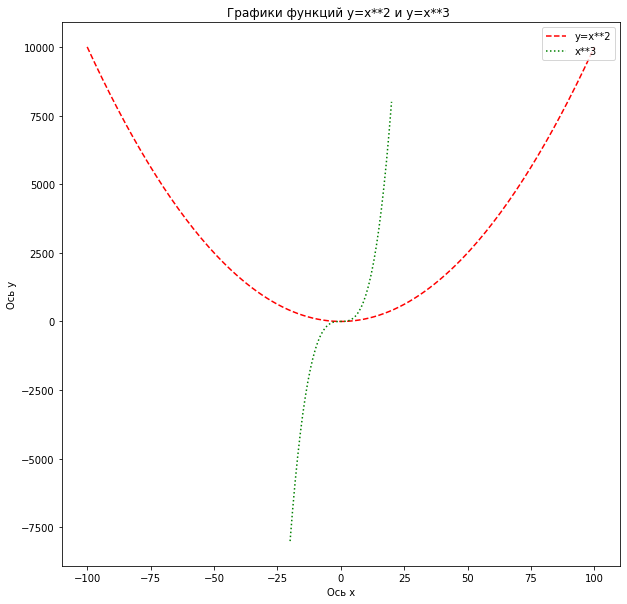

In [ ]:
# Создадим размер общего графика и выберем подходящий размер для корректного отображения графиков
plt.figure(figsize=(10,10))

x = np.linspace (-100, 100, 201)                             # Генерируем последовательность из 201 чисел в диапазоне от -100 до 100 с помощью функции linspace
y = x**2                                                     # Присваеваем каждому значению 'y' квадрат значений 'х' 

# Визуализируем график и в качестве отображения выбираем красную пунктирную линию и задаем лейбл
plt.plot (x, y, 'r--', label='y=x**2')              


# Для того, чтобы две функции были визуально понятны отображены на одном графике, присвоим переменной 'х' другие значения
# Можно воспользоваться функцией arange и создать одномерный массив
x = np.arange(-20,21, 1)
y = [el**3 for el in x]                                            # Можно присвоить значения переменной 'у' вот таким способом


# Визуализируем график y=x**3, так же другим способом зададим тип маркера, чтобы он отличался от другого.
plt.plot (x, y, 'g',  label='x**3', ls=':')

# Присвоим название графику и осям. А так же выведем легенду. 
plt.title('Графики функций y=x**2 и y=x**3 ')
plt.xlabel ('Ось х')
plt.ylabel ('Ось у')
plt.legend(loc='upper right') # Вызываем отображение легенды на графике в правомм верхнем углу

plt.show()

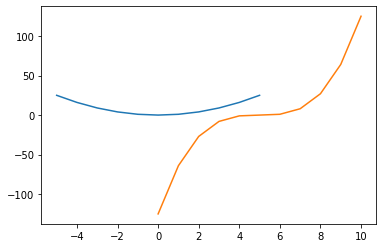

In [ ]:
# Или две функции на одном графике можно вывести таким способом. 
x = np.arange(-5,6,1)
y = x**2
plt.plot (x, y, [el**3 for el in x])    # Задав в одной функции plot
plt.show()
# Просто пример вывода без подписей


### **Задача 3**

Выведите на экран картинку ascent, которая подгружается кодом ниже.

In [ ]:
# Загружаем картинку из библиотеки scipy
from scipy import misc
img = misc.ascent()

### **Решение:**

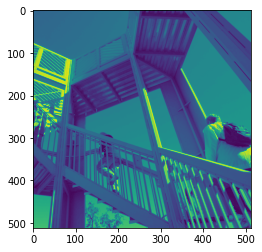

(512, 512)

In [ ]:
# выводим изображение на экран
plt.imshow(img)
plt.show()
# Так же можно вывести размер изображения
img.shape

### *Часть 2. Seaborn*

### **Задача 4**

Подгрузите данные datatraining.txt при помощи соответствующей функции библиотеки Pandas. Преобразуйте индекс в datetime index, удалите столбец с датой. Постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец Occupancy).

P.S. Используйте функцию sns.pairplot c параметром hue.

In [ ]:
# Подгружаем google-диск
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Решение:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NU/05 Matplotlib и Seaborn/datatraining.txt')

# Преобразуем индекс в datetime index взяв данные из столбца date
data.index = pd.to_datetime(data.date)

# Удалим столбец date
data.drop('date', axis = 1, inplace = True)

# Посмотрим результат
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


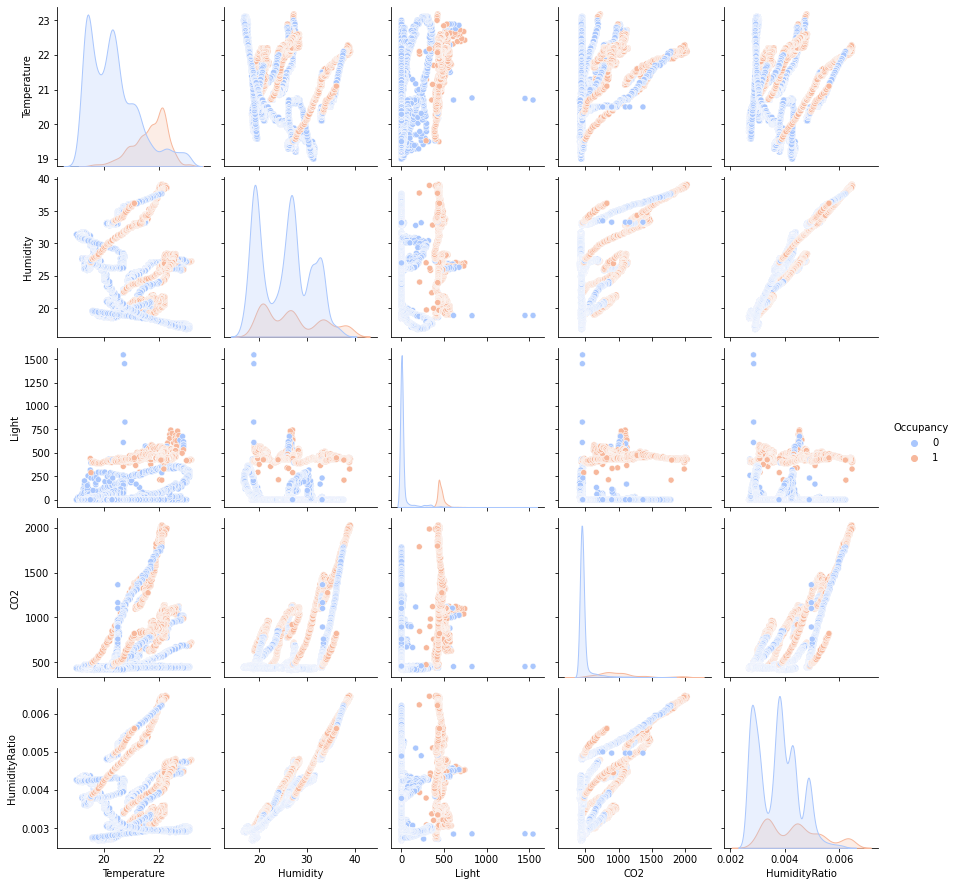

In [ ]:
# Построим графики всех парных взаимосвязей
sns.pairplot(data, hue = 'Occupancy', kind='scatter', palette='coolwarm')    # Можно изменить цвет палитры
plt.show()

### **Задача 5**

Постройте violinplot всех признаков датасета из прошлой задачи.

P.S. График должен быть читаемым, т. е.
* отрегулируйте размер графика,
* предварительно отскейлите все *числовые* признаки, т. е. приведите к стандартному нормальному распределению при помощи функции ниже.

In [ ]:
# Функция для 
def scale(df):
    return (df - df.mean()) / df.std()

### **Решение:**

In [ ]:
 # Отскейлим все признаки, которые указывают на присутствие/отсутствие в комнате (столбец Occupancy).
 # Приводить к стандартному распределению этот столбец не будем
data_normal = scale(data.drop('Occupancy', axis =1))
data_normal.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
date,,,,,
2015-02-04 17:51:00,2.518315,0.278509,1.573666,0.364926,1.091690
2015-02-04 17:51:59,2.488814,0.277696,1.591637,0.341860,1.080489
2015-02-04 17:53:00,2.488814,0.273628,1.573666,0.340269,1.075822
2015-02-04 17:54:00,2.488814,0.265492,1.573666,0.323567,1.066489
2015-02-04 17:55:00,2.439646,0.265492,1.573666,0.311636,1.049458


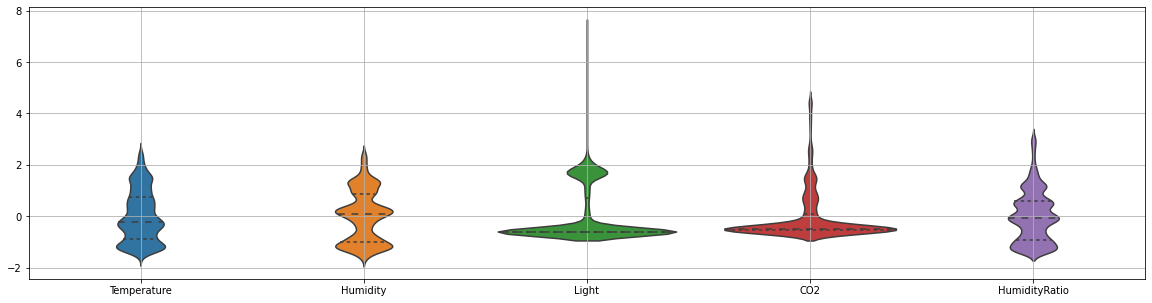

In [ ]:
plt.figure(figsize=(20,5))                                              # Зададим размеры графика побольше

sns.violinplot(data=data_normal, orient='v', inner = 'quartile')        # Сделаем вертикальную ориентацию (так проще будет понимать график)
plt.grid()                                                              # Выведем разметку для более лучшего понимания графика
plt.show()